In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from playsound import playsound

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
SR = 16000


def get_spectrogram(x):

    frame_size = 4096  # 2のべき乗
    hamming_window = np.hamming(frame_size)  # フレームサイズに合わせてハミング窓を作成
    shift_size = SR / 100  # 0.01 秒 (10 msec)
    spectrogram = []

    for i in range(0, len(x) - frame_size, int(shift_size)):
        x_frame = x[i : i + frame_size]
        x_fft = np.log(np.abs(np.fft.rfft(x_frame * hamming_window)))
        spectrogram.append(x_fft)

    return np.array(spectrogram)

In [3]:
%%time
data_dir = "./data/"
x1, _ = librosa.load(data_dir + "aiueo.wav", sr=SR)
x2, _ = librosa.load(data_dir + "aiueo2.wav", sr=SR)
anyone, _ = librosa.load(data_dir + "not-anyone-else-mono.mp3", sr=SR)
print(x1.shape, x2.shape, anyone.shape)

/home/jaeyoung/.pyenv/versions/3.9.9/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(236000,) (236000,) (4144902,)
CPU times: user 9.45 s, sys: 174 ms, total: 9.63 s
Wall time: 9.97 s


In [4]:
%%time
spectrogram = get_spectrogram(x1)
spectrogram.shape

CPU times: user 167 ms, sys: 4.82 ms, total: 172 ms
Wall time: 171 ms


(1450, 2049)

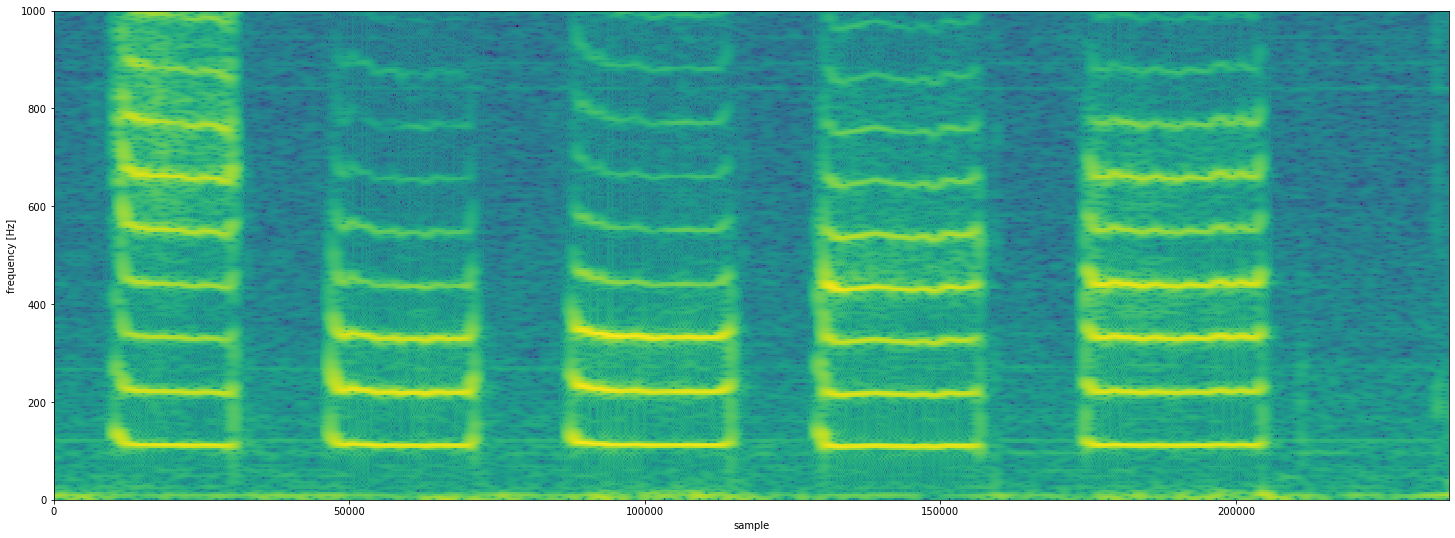

In [5]:
fig = plt.figure(figsize=(25, 9))

plt.xlabel("sample")
plt.ylabel("frequency [Hz]")
plt.imshow(
    np.flipud(spectrogram[:, : spectrogram.shape[1] // 8].T),
    extent=[0, len(x1), 0, SR // 2 // 8],
    aspect="auto",
    interpolation="nearest",
)

plt.show()

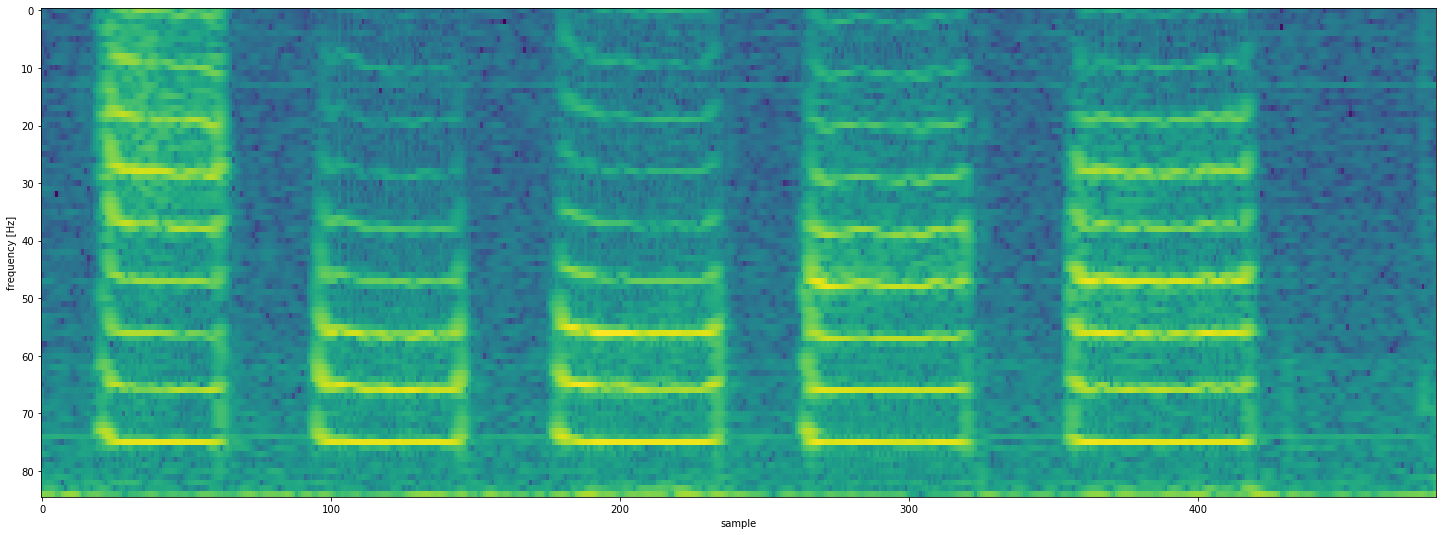

In [26]:
fig = plt.figure(figsize=(25, 9))

h, w = spectrogram.T.shape
img = cv2.resize(spectrogram.T, (w // 3, h // 3))
# img = (spectrogram.T)

plt.xlabel("sample")
plt.ylabel("frequency [Hz]")
plt.imshow(
    np.flipud(img[: img.shape[0] // 8, :]),
    # np.flipud(spectrogram[:, : spectrogram.shape[1] // 8].T),
    # extent=[0, len(x1), 0, SR // 2 // 8],
    aspect="auto",
    interpolation="nearest",
)

plt.show()

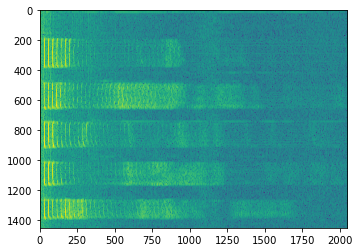

In [10]:
im = plt.imshow(
    np.flipud(spectrogram),
)

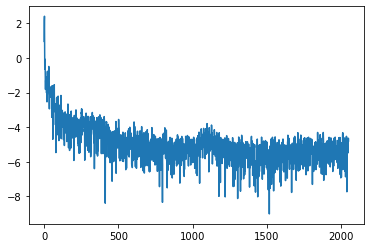

In [24]:
plt.plot(spectrogram[0])

[Text(0, 0, '-4000.0'),
 Text(0, 0, '0.0'),
 Text(0, 0, '4000.0'),
 Text(0, 0, '8000.0'),
 Text(0, 0, '12000.0'),
 Text(0, 0, '16000.0'),
 Text(0, 0, '20000.0')]

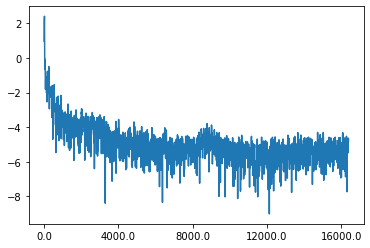

In [41]:
fig, ax = plt.subplots()
ax.plot(spectrogram[0])
xticks = ax.get_xticks()
ax.set_xticklabels(xticks * 8)